Dantar Alejandro Ortiz Vega

Analisis de series temporales

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
# Con respecto a esa libreria es la que sirve para poder hacer la prueba de Dickey-Fuller en el ultimo codigo

np.random.seed(0)
t = np.arange(120)
data = 20 + 0.05 * t + 10 * np.sin(2 * np.pi * t / 12) + np.random.normal(size=120)
serie_temporal = pd.Series(data, index=pd.date_range(start='2010-01-01', periods=120, freq='M'))
# Con respecto al codigo que paso el profesor pues como e lo dijo es respecto a la generacion de datos mediante una semilla aleatoria
# estos datos representan la temperatura estacional mensual a lo largo de los años en las que se han visto las tendencias de estos mismos datos

## 1. Visualizacion ##

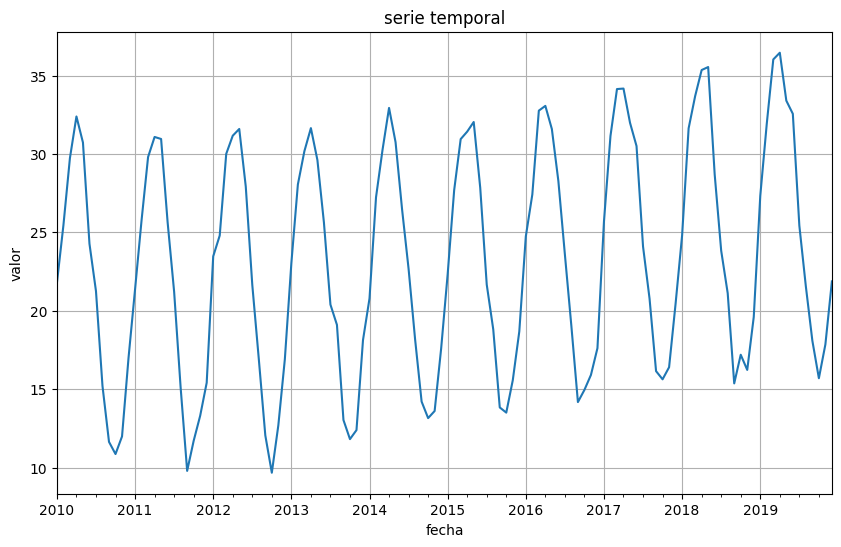

In [14]:
plt.figure(figsize=(10, 6))
serie_temporal.plot()
plt.title('serie temporal')
plt.xlabel('fecha')
plt.ylabel('valor')
plt.grid(True)
plt.show()
# Se visualiza la serie temporal viendo los cambios que esta ha tenido a lo largo de los años

## 2. Transformacion de la serie temporal ##

In [15]:
serie_diferenciada = serie_temporal.diff().dropna()
plt.figure(figsize=(10, 6))
serie_temporal.plot(label='Original')
serie_diferenciada.plot(label='Diferenciada')
plt.title('Serie Temporal Original vs Diferenciada')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()
# En esta parte transformamos la serie temporal que ya habiamos graficado a una que se diferencie de la original para su respectiva
# comparacion y hacer la serie temporal estacionaria

## 3. Dickey-Fuller ##

In [16]:
# Para algo rapida la prueba de Dickey-Fuller aumentada busca determinar si existen raices unitarias en una serie temporal
# las raices unitarias se refieren a una tendencia no estacionaria en la serie temporal lo que significa que con el tiempo cambiara
# y se veran afectadas en las series marcando un efecto permanente en esta

# Prueba de Dickey-Fuller Aumentada para la serie original
result_original = adfuller(serie_temporal)
print('Prueba de Dickey-Fuller Aumentada para la serie original:')
print('Estadístico de prueba:', result_original[0])
print('Valor p:', result_original[1])
print('Valores críticos:')
for key, value in result_original[4].items():
    print('\t%s: %.3f' % (key, value))
    
# Prueba de Dickey-Fuller Aumentada para la serie diferenciada
result_diferenciada = adfuller(serie_diferenciada)
print('\nPrueba de Dickey-Fuller Aumentada para la serie diferenciada:')
print('Estadístico de prueba:', result_diferenciada[0])
print('Valor p:', result_diferenciada[1])
print('Valores críticos:')
for key, value in result_diferenciada[4].items():
    print('\t%s: %.3f' % (key, value))

Prueba de Dickey-Fuller Aumentada para la serie original:
Estadístico de prueba: 2.0631554293063212
Valor p: 0.9987496009552816
Valores críticos:
	1%: -3.494
	5%: -2.889
	10%: -2.582

Prueba de Dickey-Fuller Aumentada para la serie diferenciada:
Estadístico de prueba: -7.86838230020556
Valor p: 5.062168776405316e-12
Valores críticos:
	1%: -3.494
	5%: -2.889
	10%: -2.582


## Conclusiones ##

Viendo la serie temporal que se genero con el primer codigo se observa el incremento lento que tuvo en los años, teniendo un valor de entre 20-30 grados a partir del 2010 hasta inicios del 2018 don empezo a sobrepasar los 35 grados, eso fue en la visualizacion y en cuanto a la transformacion se modifico dando otra grafica diferenciada donde podemos ver la perturbacion de la serie temporal con "ruido" afectandola demasiado y bueno en el ultimo punto Dickey-Fuller pues nos da el valor estadistico respecto a las dos series generadas como veran la diferencia es significativa en la prueba estadistica en la serie original y en la diferenciada, pero esto quiere decir que la serie diferenciada es estacionaria esto implicaria que la estacionalidad se eliminaron de cierta forma y bueno esos fueron las conclusiones que obtuve con respecto a los datos de ambas series